In [1]:
# Import necessary packages
from neurodsp.sim.combined import sim_combined
from neurodsp.spectral import compute_spectrum
from neurodsp.sim import sim_powerlaw, sim_oscillation
from fooof import FOOOF
from fooof.plts.fm import plot_fm
from fooof.plts import plot_spectra
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/var/folders/5j/h9q625yn13vfynsjc2bymdy00000gn/T/ipykernel_19180/949784574.py:5: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


## Overparameterizing alpha

### Simulate bursty oscillation with aperiodic activity

In [2]:
# Set parameters
n_seconds = 3
fs = 1000

# Define the components of the combined signal to simulate
components = {
    "sim_powerlaw": {"exponent": -2},
    "sim_bursty_oscillation": {
        "freq": 12.5,
        "burst_params": {"enter_burst": 0.1, "leave_burst": 0.9},
    },
}
component_variances = [1, 0.25]

# Simulate a bursty oscillation combined with aperiodic activity
np.random.seed(8)
sig = sim_combined(n_seconds, fs, components, component_variances)

### Plot alpha oscillatory parameters

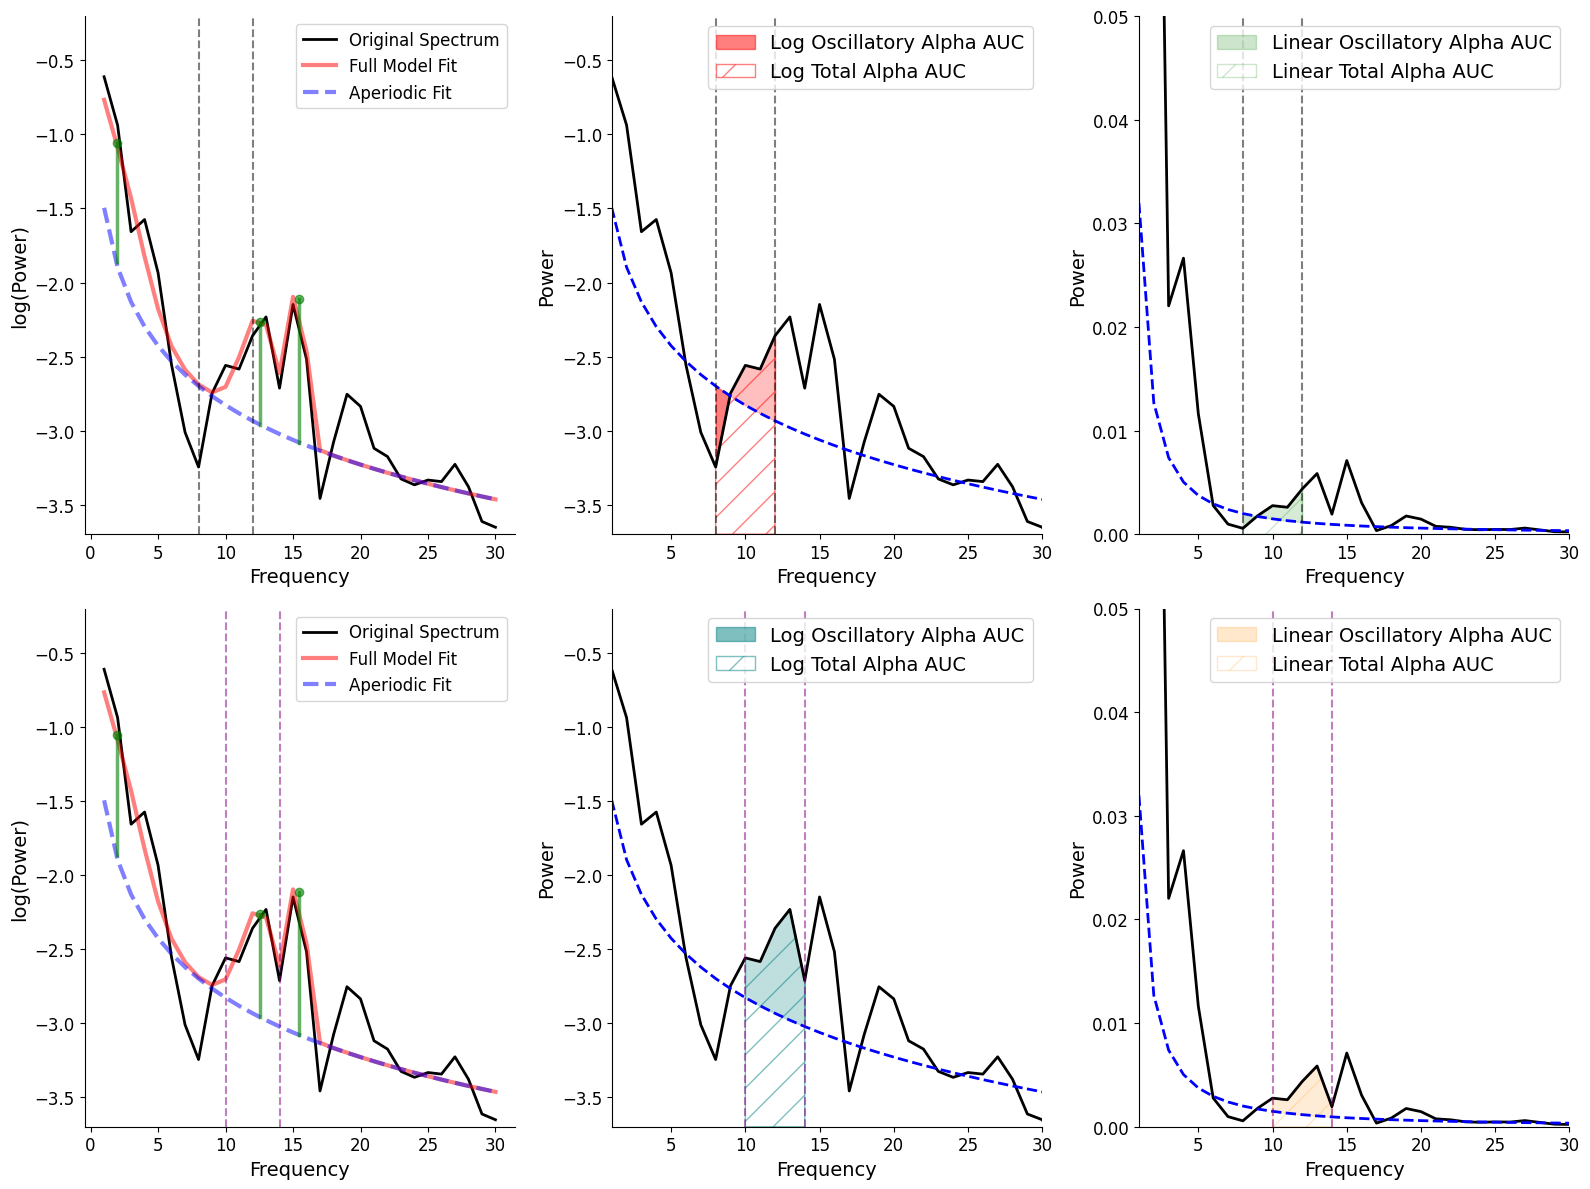

In [3]:
freqs, powers = compute_spectrum(sig, fs)

fm = FOOOF(verbose=False, max_n_peaks=3)
fm.fit(freqs, powers, freq_range=[1, 30])

fig, axes = plt.subplots(2, 3, figsize=(16, 12))

# No FOOOF peak found
plot_fm(fm, ax=axes[0, 0], plot_peaks="dot")
axes[0, 0].axvline(8, color="k", linestyle="--", alpha=0.5)
axes[0, 0].axvline(12, color="k", linestyle="--", alpha=0.5)
axes[0, 0].set_ylim([-3.7, -0.2])

# Log AUC
plot_spectra(
    freqs, powers, freq_range=[1, 30], log_powers=True, ax=axes[0, 1], c="k"
)
plot_spectra(
    freqs[1:31],
    fm._ap_fit,
    freq_range=[1, 30],
    ax=axes[0, 1],
    c="blue",
    ls="--",
)
axes[0, 1].axvline(8, color="k", linestyle="--", alpha=0.5)
axes[0, 1].axvline(12, color="k", linestyle="--", alpha=0.5)
axes[0, 1].set_ylim([-3.7, -0.2])
axes[0, 1].fill_between(
    freqs[8:13],
    fm._ap_fit[7:12],
    y2=np.log10(powers[8:13]),
    color="r",
    alpha=0.5,
    label="Log Oscillatory Alpha AUC",
)
axes[0, 1].fill_between(
    freqs[8:13],
    np.repeat(-3.7, 5),
    y2=np.log10(powers[8:13]),
    hatch="/",
    facecolor="w",
    edgecolor="r",
    alpha=0.5,
    label="Log Total Alpha AUC",
)
axes[0, 1].legend(loc="upper right", fontsize=14)

# Linear AUC
plot_spectra(freqs, powers, freq_range=[1, 30], ax=axes[0, 2], c="k")
plot_spectra(
    freqs[1:31],
    10**fm._ap_fit,
    freq_range=[1, 30],
    ax=axes[0, 2],
    c="blue",
    ls="--",
)
axes[0, 2].axvline(8, color="k", linestyle="--", alpha=0.5)
axes[0, 2].axvline(12, color="k", linestyle="--", alpha=0.5)
axes[0, 2].set_ylim([0, 0.05])
axes[0, 2].fill_between(
    freqs[8:13],
    10 ** fm._ap_fit[7:12],
    y2=powers[8:13],
    color="g",
    alpha=0.2,
    label="Linear Oscillatory Alpha AUC",
)
axes[0, 2].fill_between(
    freqs[8:13],
    np.repeat(0, 5),
    y2=powers[8:13],
    hatch="/",
    facecolor="w",
    edgecolor="g",
    alpha=0.2,
    label="Linear Total Alpha AUC",
)
axes[0, 2].legend(loc="upper right", fontsize=14)

# No FOOOF peak found
plot_fm(fm, ax=axes[1, 0], plot_peaks="dot")
axes[1, 0].axvline(10, color="purple", linestyle="--", alpha=0.5)
axes[1, 0].axvline(14, color="purple", linestyle="--", alpha=0.5)
axes[1, 0].set_ylim([-3.7, -0.2])

# Log AUC
plot_spectra(
    freqs, powers, freq_range=[1, 30], log_powers=True, ax=axes[1, 1], c="k"
)
plot_spectra(
    freqs[1:31],
    fm._ap_fit,
    freq_range=[1, 30],
    ax=axes[1, 1],
    c="blue",
    ls="--",
)
axes[1, 1].axvline(10, color="purple", linestyle="--", alpha=0.5)
axes[1, 1].axvline(14, color="purple", linestyle="--", alpha=0.5)
axes[1, 1].set_ylim([-3.7, -0.2])
axes[1, 1].fill_between(
    freqs[10:15],
    fm._ap_fit[9:14],
    y2=np.log10(powers[10:15]),
    color="teal",
    alpha=0.5,
    label="Log Oscillatory Alpha AUC",
)
axes[1, 1].fill_between(
    freqs[10:15],
    np.repeat(-3.7, 5),
    y2=np.log10(powers[10:15]),
    hatch="/",
    facecolor="w",
    edgecolor="teal",
    alpha=0.5,
    label="Log Total Alpha AUC",
)
axes[1, 1].legend(loc="upper right", fontsize=14)

# Linear AUC
plot_spectra(freqs, powers, freq_range=[1, 30], ax=axes[1, 2], c="k")
plot_spectra(
    freqs[1:31],
    10**fm._ap_fit,
    freq_range=[1, 30],
    ax=axes[1, 2],
    c="blue",
    ls="--",
)
axes[1, 2].axvline(10, color="purple", linestyle="--", alpha=0.5)
axes[1, 2].axvline(14, color="purple", linestyle="--", alpha=0.5)
axes[1, 2].set_ylim([0, 0.05])
axes[1, 2].fill_between(
    freqs[10:15],
    10 ** fm._ap_fit[9:14],
    y2=powers[10:15],
    color="darkorange",
    alpha=0.2,
    label="Linear Oscillatory Alpha AUC",
)
axes[1, 2].fill_between(
    freqs[10:15],
    np.repeat(0, 5),
    y2=powers[10:15],
    hatch="/",
    facecolor="w",
    edgecolor="darkorange",
    alpha=0.2,
    label="Linear Total Alpha AUC",
)
axes[1, 2].legend(loc="upper right", fontsize=14)

for i in range(2):
    for j in range(3):
        ax = axes[i, j]
        ax.grid(False)
        sns.despine(ax=ax)

## Alpha oscillatory and aperiodic activity

In [4]:
# Set parameters
n_seconds = 100
alpha_freq = 10
fs = 1000
exp = -1
fmax = 100
colors = (
    "#b452ff",  # blue
    "#00bfa2",  # green
    "#ff7231",  # bright red
)
alpha_amps = (0, 1, 1)
ei_ratios = (1, 1 / 6, 1 / 6)
e_exp = -0.7
i_exp = -2
e_color = "#cb2217"
i_color = "#4b66c6"

### Simulate alpha oscillatory activity during eyes closed

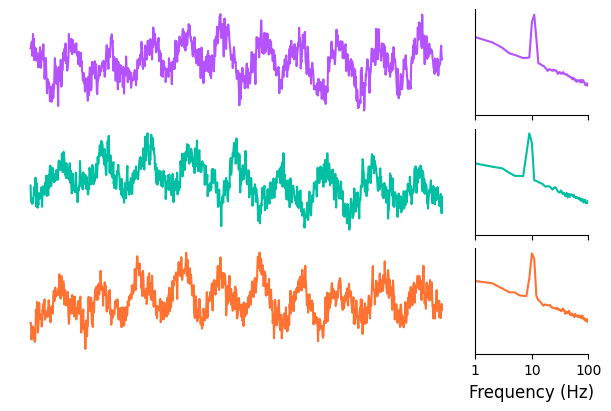

In [5]:
# Simulation for eyes closed
n_populations = 3
closed_sigs = [
    sim_powerlaw(n_seconds, fs, exp + 0.4 * np.random.rand() - 0.2)
    + sim_oscillation(
        n_seconds,
        fs,
        alpha_freq + 2 * np.random.rand() - 1,
        phase=np.random.rand(),
    )
    for _ in range(n_populations)
]
closed_psds = [compute_spectrum(closed_sig, fs) for closed_sig in closed_sigs]

# Make figure
fig = plt.figure(constrained_layout=True, figsize=(6, 4))
gs = fig.add_gridspec(n_populations, 5)
psd_ax1 = fig.add_subplot(gs[0, -1])
for i, (sig, (freqs, psd), c) in enumerate(
    zip(closed_sigs, closed_psds, colors[:n_populations])
):
    # Get axes
    ts_ax = fig.add_subplot(gs[i, :-1])
    psd_ax = psd_ax1
    if i > 0:
        psd_ax = fig.add_subplot(gs[i, -1], sharey=psd_ax1)

    # Plot time series
    ts_ax.plot(sig[:fs], color=c)
    ts_ax.axis("off")

    # Plot PSD
    psd_ax.plot(freqs, psd, color=c)
    psd_ax.set_xlim([1, fmax])
    psd_ax.set_xscale("log")
    psd_ax.set_yscale("log")
    psd_ax.set_xticks([], minor=True)
    psd_ax.set_xticks([1, 10, 100], [], minor=False)
    if i == n_populations - 1:
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel("Frequency (Hz)", fontsize=12)
    psd_ax.set_yticks([], minor=True)
    psd_ax.set_yticks([], minor=False)
    sns.despine(ax=psd_ax)

plt.savefig("../figs/closed.pdf", dpi=300, bbox_inches="tight")

### Simulate aperiodic activity for complex stimulus

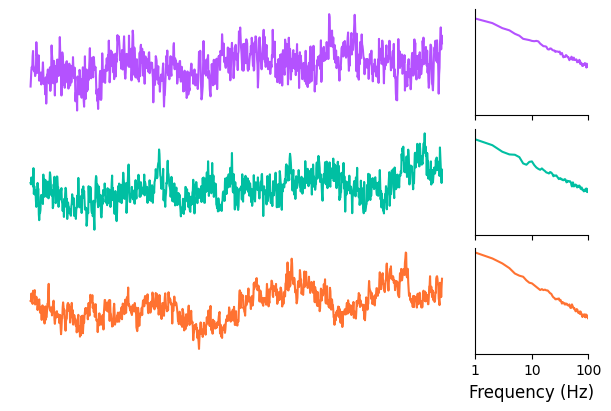

In [6]:
# Simulations for complex stimulus (i.e. Brad's face)
n_populations = 3
complex_stim_sigs = [
    sim_powerlaw(n_seconds, fs, exp + 0.4 * np.random.rand() - 0.2)
    for _ in range(n_populations)
]
complex_stim_psds = [compute_spectrum(sig, fs) for sig in complex_stim_sigs]

# Make figure
fig = plt.figure(constrained_layout=True, figsize=(6, 4))
gs = fig.add_gridspec(n_populations, 5)
psd_ax1 = fig.add_subplot(gs[0, -1])
for i, (sig, (freqs, psd), c) in enumerate(
    zip(complex_stim_sigs, complex_stim_psds, colors[:n_populations])
):
    # Get axes
    ts_ax = fig.add_subplot(gs[i, :-1])
    psd_ax = psd_ax1
    if i > 0:
        psd_ax = fig.add_subplot(gs[i, -1], sharey=psd_ax1)

    # Plot time series
    ts_ax.plot(sig[:fs], color=c)
    ts_ax.axis("off")

    # Plot PSD
    psd_ax.plot(freqs, psd, color=c)
    psd_ax.set_xlim([1, fmax])
    psd_ax.set_xscale("log")
    psd_ax.set_yscale("log")
    psd_ax.set_xticks([], minor=True)
    psd_ax.set_xticks([1, 10, 100], [], minor=False)
    if i == n_populations - 1:
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel("Frequency (Hz)", fontsize=12)
    psd_ax.set_yticks([], minor=True)
    psd_ax.set_yticks([], minor=False)
    sns.despine(ax=psd_ax)

plt.savefig("../figs/complex_stim.pdf", dpi=300, bbox_inches="tight")

### Simulate selective alpha reduction in working memory

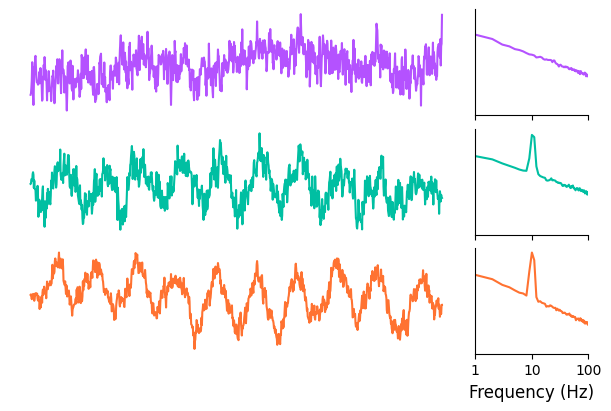

In [7]:
# Simulation for alpha WM
n_populations = 3
alpha_wm_sigs = [
    sim_powerlaw(n_seconds, fs, exp + 0.4 * np.random.rand() - 0.2)
    + amp
    * sim_oscillation(
        n_seconds,
        fs,
        alpha_freq + 2 * np.random.rand() - 1,
        phase=np.random.rand(),
    )
    for amp in alpha_amps
]
alpha_wm_psds = [
    compute_spectrum(alpha_wm_sig, fs) for alpha_wm_sig in alpha_wm_sigs
]

# Make figure
fig = plt.figure(constrained_layout=True, figsize=(6, 4))
gs = fig.add_gridspec(n_populations, 5)
psd_ax1 = fig.add_subplot(gs[0, -1])
for i, (sig, (freqs, psd), c) in enumerate(
    zip(alpha_wm_sigs, alpha_wm_psds, colors)
):
    # Get axes
    ts_ax = fig.add_subplot(gs[i, :-1])
    psd_ax = psd_ax1
    if i > 0:
        psd_ax = fig.add_subplot(gs[i, -1], sharey=psd_ax1)

    # Plot time series
    ts_ax.plot(sig[:fs], color=c)
    ts_ax.axis("off")

    # Plot PSD
    psd_ax.plot(freqs, psd, color=c)
    psd_ax.set_xlim([1, fmax])
    psd_ax.set_xscale("log")
    psd_ax.set_yscale("log")
    psd_ax.set_xticks([], minor=True)
    psd_ax.set_xticks([1, 10, 100], [], minor=False)
    if i == n_populations - 1:
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel("Frequency (Hz)", fontsize=12)
    psd_ax.set_yticks([], minor=True)
    psd_ax.set_yticks([], minor=False)
    sns.despine(ax=psd_ax)

plt.savefig("../figs/alpha_wm.pdf", dpi=300, bbox_inches="tight")

### Simulate selective shift in exponent (E/I balance)

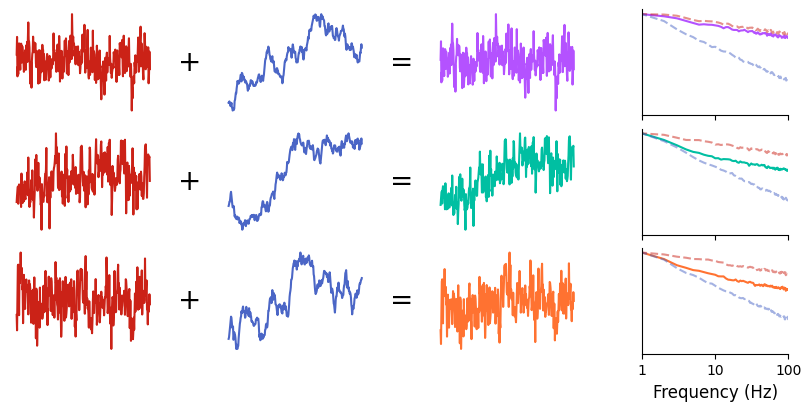

In [8]:
# Simulation for selective shift in exponent (E/I balance)
e_sigs = [sim_powerlaw(n_seconds, fs, e_exp) for _ in range(n_populations)]
i_sigs = [sim_powerlaw(n_seconds, fs, i_exp) for _ in range(n_populations)]
exp_sigs = [
    amp * e_sig + i_sig for amp, e_sig, i_sig in zip(ei_ratios, e_sigs, i_sigs)
]

# Make figure
fig = plt.figure(constrained_layout=True, figsize=(8, 4))
gs = fig.add_gridspec(n_populations, 15)
psd_ax1 = fig.add_subplot(gs[0, -3:])
for i, (sig, e_sig, i_sig, c) in enumerate(
    zip(exp_sigs, e_sigs, i_sigs, colors)
):
    # Get axes
    e_ax = fig.add_subplot(gs[i, :3])
    plus_ax = fig.add_subplot(gs[i, 3])
    i_ax = fig.add_subplot(gs[i, 4:7])
    equals_ax = fig.add_subplot(gs[i, 7])
    ts_ax = fig.add_subplot(gs[i, 8:11])
    psd_ax = psd_ax1
    if i > 0:
        psd_ax = fig.add_subplot(gs[i, -3:], sharey=psd_ax1)

    # Plot excitatory current
    e_ax.plot(e_sig[: np.floor(fs / 3).astype(int)], color=e_color)
    e_ax.axis("off")

    # Plot plus sign with no axis
    plus_ax.text(0.5, 0.5, "+", fontsize=20, ha="center", va="center")
    plus_ax.axis("off")

    # Plot inhibitory current
    i_ax.plot(i_sig[: np.floor(fs / 3).astype(int)], color=i_color)
    i_ax.axis("off")

    # Plot equals sign with no axis
    equals_ax.text(0.5, 0.5, "=", fontsize=20, ha="center", va="center")
    equals_ax.axis("off")

    # Plot time series
    ts_ax.plot(sig[: np.floor(fs / 3).astype(int)], color=c)
    ts_ax.axis("off")

    # Compute PSDs
    freqs, psd = compute_spectrum(sig, fs)
    _, e_psd = compute_spectrum(e_sig, fs)
    _, i_psd = compute_spectrum(i_sig, fs)

    # Normalize offset
    psd = psd / np.max(psd)
    e_psd = e_psd / np.max(e_psd)
    i_psd = i_psd / np.max(i_psd)

    # Plot power spectra
    psd_ax.plot(freqs, psd, color=c)
    psd_ax.plot(freqs, e_psd, color=e_color, ls="--", alpha=0.5)
    psd_ax.plot(freqs, i_psd, color=i_color, ls="--", alpha=0.5)
    psd_ax.set_xlim([1, fmax])
    psd_ax.set_xscale("log")
    psd_ax.set_yscale("log")
    psd_ax.set_xticks([], minor=True)
    psd_ax.set_xticks([1, 10, 100], [], minor=False)
    if i == n_populations - 1:
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel("Frequency (Hz)", fontsize=12)
    psd_ax.set_yticks([], minor=True)
    psd_ax.set_yticks([], minor=False)
    sns.despine(ax=psd_ax)

plt.savefig("../figs/exp.pdf", dpi=300, bbox_inches="tight")

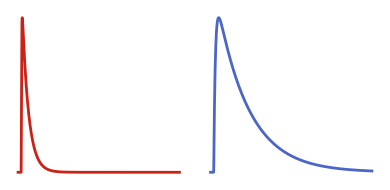

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def double_exponential(t, tau_rise, tau_decay):
    """Causal double exponential function normalized to peak at 1."""
    g = np.exp(-t / tau_decay) - np.exp(-t / tau_rise)
    g[t < 0] = 0  # Ensure causality
    if np.max(g) != 0:
        g /= np.max(g)
    return g


# Time vector (ms)
t = np.linspace(-1, 50, 1000)

# Time constants
tau_rise_ampa, tau_decay_ampa = 0.1, 2.0
tau_rise_gabaa, tau_decay_gabaa = 0.5, 10.0

# Generate profiles
g_ampa = double_exponential(t, tau_rise_ampa, tau_decay_ampa)
g_gabaa = double_exponential(t, tau_rise_gabaa, tau_decay_gabaa)

# Set up figure with gridspec
fig = plt.figure(figsize=(4, 2))
gs = GridSpec(nrows=1, ncols=2)

# AMPA subplot
ax1 = fig.add_subplot(gs[0])
ax1.plot(t, g_ampa, label="AMPA (0.1/2 ms)", color=e_color, linewidth=2)
ax1.axis("off")

# GABA_A subplot
ax2 = fig.add_subplot(gs[1])
ax2.plot(t, g_gabaa, label="GABA_A (0.5/10 ms)", color=i_color, linewidth=2)
ax2.axis("off")

plt.tight_layout()
plt.savefig("../figs/psp.pdf", dpi=300, bbox_inches="tight")

In [10]:
from scipy.signal import butter, filtfilt
from neurodsp.sim.modulate import rotate_timeseries
import fooof
from fooof.utils import trim_spectrum
import pandas as pd
import params

In [11]:
def plot_sparam_psd(
    freqs,
    powers,
    ax,
    n_peaks=params.N_PEAKS,
    peak_width_lims=params.PEAK_WIDTH_LIMS,
    fmin=params.FMIN,
    fmax=params.FMAX,
    plot_freq_range=params.PLOT_FREQ_RANGE,
    alpha_band=params.ALPHA_BAND,
    params_to_plot=params.PARAMS_TO_PLOT,
):
    """Plot spectral parameterization (log-log version)."""
    eps = 1e-10  # Small value to avoid log(0)

    # Restrict to just specified frequencies
    valid_freqs = (fmin <= freqs) & (freqs <= fmax)
    freqs = freqs[valid_freqs]
    powers = np.clip(powers[valid_freqs], eps, None)  # Ensure all y values > 0

    # Compute spectral parameterization
    fm = fooof.FOOOF(
        max_n_peaks=n_peaks, peak_width_limits=peak_width_lims, verbose=False
    )
    fm.fit(freqs, powers, freq_range=(fmin, fmax))

    # Return if no axes provided
    if ax is None:
        return fm

    # Determine indices for alpha band in frequencies array
    low_freq_idx = np.argmin(np.abs(freqs - alpha_band[0]))
    high_freq_idx = np.argmin(np.abs(freqs - alpha_band[1]))

    # Plot exponent fit
    plot_spectra(
        freqs,
        10**fm._ap_fit,
        freq_range=plot_freq_range,
        ax=ax,
        c=params_to_plot["exponent"]["color"],
        ls="--",
        label="aperiodic exponent",
    )

    # Band-specific data
    band_freqs = freqs[low_freq_idx : high_freq_idx + 1]
    band_powers = powers[low_freq_idx : high_freq_idx + 1]
    band_fit = 10 ** fm._ap_fit[low_freq_idx : high_freq_idx + 1]

    # Plot AUC measure for band
    ax.fill_between(
        band_freqs,
        eps,
        band_powers,
        hatch="/",
        color=params_to_plot["total_power"]["color"],
        alpha=0.5,
        label=params_to_plot["total_power"]["name"],
    )
    ax.fill_between(
        band_freqs,
        band_fit,
        band_powers,
        color=params_to_plot["linOscAUC"]["color"],
        alpha=0.8,
        label=params_to_plot["linOscAUC"]["name"],
    )

    # Plot Greek character
    y_max = band_powers.max()
    # ax.text(
    #     (band_freqs[0] + band_freqs[-1]) / 2,
    #     0.9 * y_max,
    #     rf'$\{params_to_plot["linOscAUC"]["name"].split()[0].lower()}$',
    #     fontsize=24,
    #     color=params_to_plot["linOscAUC"]["color"],
    #     va="top",
    #     ha="center",
    # )

    # Plot bands
    ax.fill_betweenx(
        [eps, y_max],
        band_freqs[0],
        band_freqs[-1],
        facecolor=params_to_plot["total_power"]["color"],
        alpha=0.1,
    )
    # ax.legend(loc="upper right")
    return ax, fm

In [12]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert


def bandpass_filter(data, fs, lowcut, highcut, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype="band")
    return filtfilt(b, a, data)


def compute_instant_alpha_power(data, fs, alpha_band=(8, 12)):
    # Step 1: Bandpass filter
    filtered = bandpass_filter(data, fs, alpha_band[0], alpha_band[1])

    # Step 2: Hilbert transform
    analytic_signal = hilbert(filtered)

    # Step 3: Envelope (amplitude)
    amplitude_envelope = np.abs(analytic_signal)

    # Step 4: Power (optional)
    power = amplitude_envelope**2

    return power, amplitude_envelope, filtered

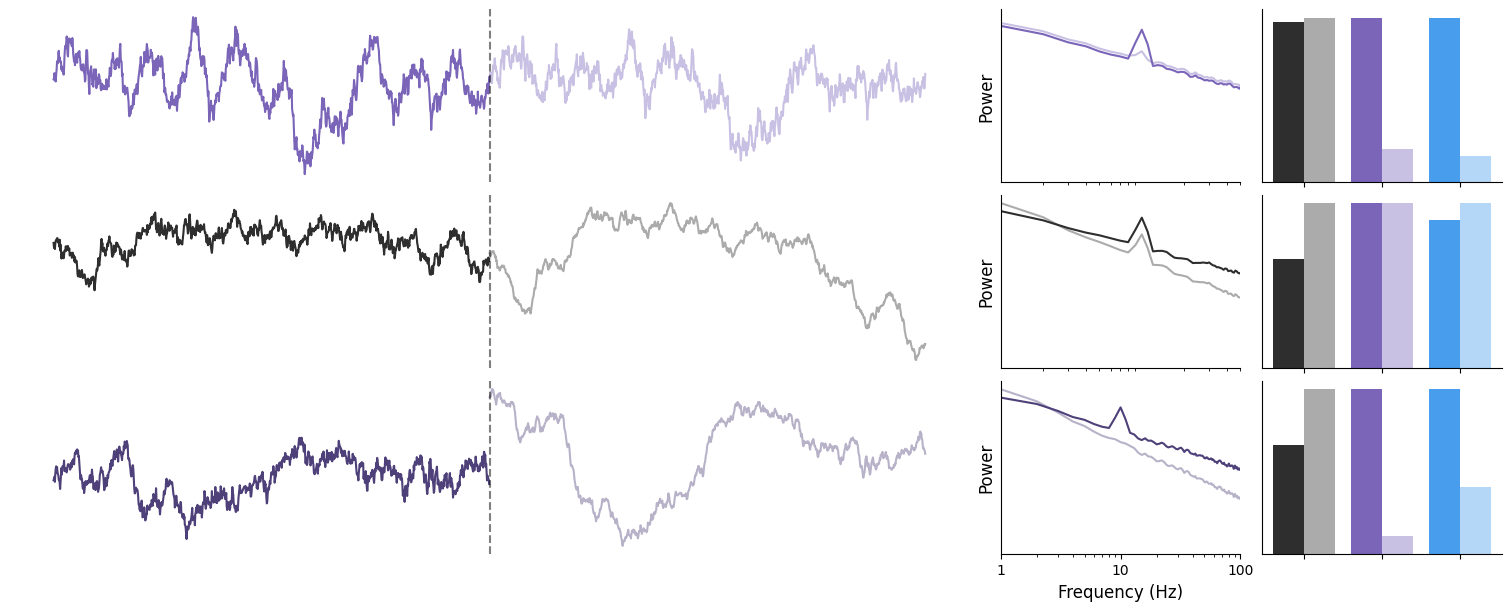

In [13]:
np.random.seed(21)
n_seconds_sim = 100
n_seconds_plot = 1
fs = 1000
n_plot = n_seconds_plot * fs
blend_duration = 0.1  # seconds
blend_samples = int(blend_duration * fs)

n_populations = 3
alpha_freq = 10
rot_freq = 20
fmax = 50
colors = ["#7a65b9", "#2e2e2e", "#4E4079"]

alpha_amps_pre = (0.2, 0.2, 0.2)
exps_pre = (-1.5, -1.5, -1.5)
alpha_amps_post = (0.05, 0.2, 0)
exps_change = (0, 0.7, 0.7)


def blend_transition(pre, post, fs, cutoff=30, order=4):
    b, a = butter(order, cutoff / (fs / 2), btype="low")
    pre_filt = filtfilt(b, a, pre)
    post_filt = filtfilt(b, a, post)
    return np.concatenate((pre_filt, post_filt))


# --- Simulate Signals ---
exp_sigs_pre = [sim_powerlaw(n_seconds_sim, fs, exp) for exp in exps_pre]
exp_sigs_post = [
    rotate_timeseries(sig_pre, fs, exp, f_rotation=rot_freq)
    for sig_pre, exp in zip(exp_sigs_pre, exps_change)
]

alpha_full = [
    sim_oscillation(2 * n_seconds_sim, fs, alpha_freq, phase=np.random.rand())
    for _ in range(n_populations)
]
alpha_sigs_pre = [
    amp * alpha[: n_seconds_sim * fs]
    for amp, alpha in zip(alpha_amps_pre, alpha_full)
]
alpha_sigs_post = [
    amp * alpha[n_seconds_sim * fs :]
    for amp, alpha in zip(alpha_amps_post, alpha_full)
]

full_sigs_pre = [
    exp + alpha for exp, alpha in zip(exp_sigs_pre, alpha_sigs_pre)
]
full_sigs_post = [
    exp + alpha for exp, alpha in zip(exp_sigs_post, alpha_sigs_post)
]

full_psds_pre = [compute_spectrum(sig, fs) for sig in full_sigs_pre]
full_psds_post = [compute_spectrum(sig, fs) for sig in full_sigs_post]

# --- Plotting (Modified Layout) ---
fig = plt.figure(constrained_layout=True, figsize=(15, 6))
gs = fig.add_gridspec(n_populations, 6)
psd_ax1 = fig.add_subplot(gs[0, -2])

for i, (
    sig_pre,
    (freqs_pre, psd_pre),
    sig_post,
    (freqs_post, psd_post),
    c,
) in enumerate(
    zip(
        full_sigs_pre,
        full_psds_pre,
        full_sigs_post,
        full_psds_post,
        colors,
    )
):
    # Time series axis
    ts_ax = fig.add_subplot(gs[i, :-2])
    psd_ax = psd_ax1 if i == 0 else fig.add_subplot(gs[i, -2], sharey=psd_ax1)

    pre_cut = sig_pre[:n_plot]
    post_cut = sig_post[:n_plot]

    # Plot pre (opaque) and post (faded)
    ts_ax.plot(np.arange(n_plot), pre_cut, color=c, alpha=1.0)
    ts_ax.plot(np.arange(n_plot, 2 * n_plot), post_cut, color=c, alpha=0.4)
    ts_ax.axvline(n_plot, c="k", ls="--", alpha=0.5)
    ts_ax.axis("off")

    # Normalize by total power
    psd_pre = psd_pre / np.sum(psd_pre)
    psd_post = psd_post / np.sum(psd_post)

    # Plot PSDs: pre (opaque), post (faded)
    psd_ax.plot(freqs_pre, psd_pre, color=c, alpha=1.0)
    psd_ax.plot(freqs_post, psd_post, color=c, alpha=0.4)
    psd_ax.set_xlim([1, fmax])
    psd_ax.set_xscale("log")
    psd_ax.set_yscale("log")
    if i == n_populations - 1:
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel("Frequency (Hz)", fontsize=12)
    else:
        psd_ax.set_xticks([])
    psd_ax.set_yticks([])
    psd_ax.set_ylabel("Power", fontsize=12)
    sns.despine(ax=psd_ax)

    # Get FOOOF fit
    fooof_ax = fig.add_subplot(gs[i, -1])
    s_pre = plot_sparam_psd(freqs_pre, psd_pre, ax=None).to_df(
        fooof.Bands({"alpha": [8, 12]})
    )
    s_post = plot_sparam_psd(freqs_post, psd_post, ax=None).to_df(
        fooof.Bands({"alpha": [8, 12]})
    )

    # Compute filter-Hilbert
    alpha_power_pre, _, _ = compute_instant_alpha_power(
        sig_pre, fs, alpha_band=(8, 12)
    )
    alpha_power_post, _, _ = compute_instant_alpha_power(
        sig_post, fs, alpha_band=(8, 12)
    )
    s_pre["alpha_power"] = np.mean(alpha_power_pre)
    s_post["alpha_power"] = np.mean(alpha_power_post)

    # Fix alpha pw
    if i == 1:
        s_pre["alpha_pw"] = np.max([s_pre["alpha_pw"], s_post["alpha_pw"]])
        s_post["alpha_pw"] = np.max([s_pre["alpha_pw"], s_post["alpha_pw"]])

    # Select specified parameters
    params_to_plot = ["exponent", "alpha_pw", "alpha_power"]
    param_colors = ["#2e2e2e", "#7a65b9", "#489ded"]
    bar_width = 0.4
    x = range(len(params_to_plot))

    for j, param in enumerate(params_to_plot):
        color = param_colors[j]
        pre_val = s_pre[param]
        post_val = s_post[param]
        max_val = max(pre_val, post_val) or 1

        # Normalize
        pre_norm = pre_val / max_val
        post_norm = post_val / max_val

        # Plot bars: pre (opaque), post (faded)
        fooof_ax.bar(
            j - bar_width / 2,
            pre_norm,
            width=bar_width,
            color=color,
            alpha=1.0,
        )
        fooof_ax.bar(
            j + bar_width / 2,
            post_norm,
            width=bar_width,
            color=color,
            alpha=0.4,
        )

    fooof_ax.set_xticklabels([])  # no tick labels
    fooof_ax.set_ylabel("")
    fooof_ax.set_xlabel("")
    fooof_ax.set_yticks([])
    sns.despine(ax=fooof_ax)

plt.savefig("../figs/alpha_aperiodic.pdf", dpi=300, bbox_inches="tight")
plt.show()

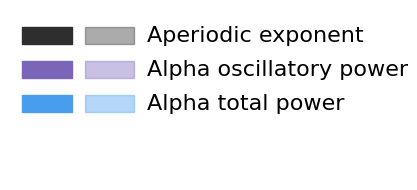

In [14]:
from matplotlib.patches import Rectangle

# Clean, grouped bar-style legend with no pre/post labels
fig_legend, ax_legend = plt.subplots(figsize=(4, 2))
ax_legend.axis("off")

# Rectangle dimensions (like real bar plots)
bar_w = 0.2  # width of each color block
bar_h = 0.1  # height (shorter than width, like real bars)
gap = 0.05  # horizontal gap between pre/post
text_offset = 0.65  # distance to text
row_height = 0.2  # vertical spacing between rows

param_labels = {
    "exponent": "Aperiodic exponent",
    "alpha_pw": "Alpha oscillatory power",
    "alpha_power": "Alpha total power",
}

for i, (param, color) in enumerate(zip(params_to_plot, param_colors)):
    y = 1 - (i + 1) * row_height

    # Bars
    ax_legend.add_patch(
        Rectangle((0.05, y), bar_w, bar_h, color=color, alpha=1.0)
    )
    ax_legend.add_patch(
        Rectangle(
            (0.05 + bar_w + gap, y), bar_w, bar_h, color=color, alpha=0.4
        )
    )

    # Label with dictionary
    label = param_labels.get(param, param)
    ax_legend.text(
        0.05 + 2 * bar_w + 2 * gap,
        y + bar_h / 2,
        label,
        va="center",
        fontsize=16,
    )

# Limits and layout
ax_legend.set_xlim(0, 1)
ax_legend.set_ylim(0, 1)
ax_legend.set_aspect("auto")
fig_legend.tight_layout()

# Save and show
fig_legend.savefig(
    "../figs/alpha_aperiodic_legend_grouped.pdf", bbox_inches="tight", dpi=300
)
plt.show()

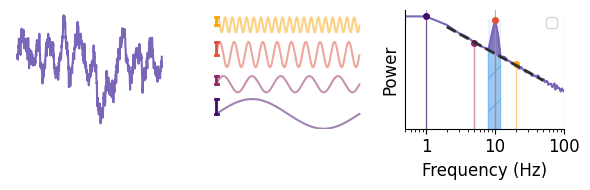

In [15]:
# --- Plotting (Original Layout) ---
n_populations = 1
sin_freqs = [1, 5, 10, 20]
fig = plt.figure(constrained_layout=True, figsize=(6, 2 * n_populations))
gs = fig.add_gridspec(n_populations, 6)
psd_ax1 = fig.add_subplot(gs[0, -2:])

for i, (sig_pre, (freqs_pre, psd_pre), c) in enumerate(
    zip(
        full_sigs_pre[:n_populations],
        full_psds_pre[:n_populations],
        colors[:n_populations],
    )
):
    # Time series axis
    ts_ax = fig.add_subplot(gs[i, :2])
    sin_ax = fig.add_subplot(gs[i, 2:4])
    psd_ax = psd_ax1 if i == 0 else fig.add_subplot(gs[i, -2:], sharey=psd_ax1)

    # Plot time series
    ts_ax.plot(sig_pre[:n_plot], color=c)
    ts_ax.axis("off")

    # Plot sinusoids for Fourier
    n_sin = len(sin_freqs)
    samps = np.arange(0, n_plot)
    sin_colors = sns.color_palette("inferno", n_sin)
    closest_idxs = [np.abs(freqs_pre - sf).argmin() for sf in sin_freqs]
    sin_amps = (psd_pre[closest_idxs] / np.max(psd_pre)) / 2 + 0.5
    for j, (amp, freq, sin_c) in enumerate(
        zip(sin_amps, sin_freqs, sin_colors)
    ):
        y_offset = (2 * j) - (n_sin - 1)
        y = amp * np.sin(2 * np.pi * freq * samps / fs) + y_offset
        sin_ax.plot(samps, y, color=sin_c, alpha=0.5)

        # Amplitude bar with caps on the front (x = 0)
        x0 = 0
        y0 = y_offset
        y1 = y_offset + amp
        cap_width = fs * 0.01  # cap half-width in samples

        # vertical bar
        sin_ax.plot([x0, x0], [y0, y1], color=sin_c, lw=2)
        # horizontal caps
        sin_ax.plot(
            [x0 - cap_width, x0 + cap_width], [y0, y0], color=sin_c, lw=2
        )  # bottom
        sin_ax.plot(
            [x0 - cap_width, x0 + cap_width], [y1, y1], color=sin_c, lw=2
        )  # top

    sin_ax.set_ylim([-n_sin, n_sin])
    sin_ax.axis("off")

    # # Normalize by total power
    psd_pre = psd_pre / np.sum(psd_pre)

    # Plot PSDs
    psd_ax.plot(freqs_pre, psd_pre, color=c)
    psd_ax.set_xlim([0.5, fmax])
    psd_ax.set_xscale("log")
    psd_ax.set_yscale("log")
    if i == (n_populations - 1):
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel("Frequency (Hz)", fontsize=12)
    else:
        psd_ax.set_xticks([])
    psd_ax.set_yticks([])
    psd_ax.set_ylabel("Power", fontsize=12)

    # Minimum visible PSD value (for vertical lines to start from)
    ymin, ymax = psd_ax.get_ylim()

    # Plot vertical lines to each marker
    for j, (sf, idx) in enumerate(zip(sin_freqs, closest_idxs)):
        x = freqs_pre[idx]
        y = psd_pre[idx]
        sin_c = sin_colors[j]

        # Vertical line from bottom to marker
        psd_ax.plot([x, x], [ymin, y], color=sin_c, lw=1, alpha=0.5)

        # Marker itself
        psd_ax.plot(x, y, "o", color=sin_c, markersize=4)
    psd_ax.set_ylim([ymin, ymax * 1.1])

    #
    plot_sparam_psd(freqs_pre, psd_pre, ax=psd_ax)
    psd_ax.legend([])
    # psd_ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    psd_ax.set_xlim([0.5, fmax])
    psd_ax.set_xscale("log")
    psd_ax.set_yscale("log")
    if i == (n_populations - 1):
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel("Frequency (Hz)", fontsize=12)
    else:
        psd_ax.set_xticks([])
    psd_ax.set_yticks([])
    psd_ax.set_ylabel("Power", fontsize=12)
    sns.despine(ax=psd_ax)

plt.savefig("../figs/alpha_fourier_fooof.pdf", dpi=300, bbox_inches="tight")
plt.show()